In [1]:
#import gc
#gc.collect()
import pandas as pd
import numpy as np
#from plotnine import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
# https://www.cbsl.gov.lk/en/statistics/statistical-tables/external-sector
url_bop = 'C:/Users/Dimuthu/Downloads/table2.10_20220331_e.xlsx'


# Financial Account

Explanation of the financial account. Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum

In [2]:
xls = pd.ExcelFile(url_bop)
financial_account=pd.read_excel(url_bop, sheet_name=xls.sheet_names[1],skiprows=1)
financial_account = financial_account.dropna(how='all')
financial_account['variable'] = ''

for i in range(1,financial_account.shape[0]):
    for j in range(0,8):
        if(pd.isna(financial_account.iloc[i,j])):
            pass
        else:
            financial_account.variable.iloc[[i]] = financial_account.iloc[i,j]
financial_account.drop(columns=financial_account.columns[:8],axis=1,inplace=True)

row_names = financial_account.loc[0,:].values.tolist()
financial_account = financial_account.iloc[2:]
column_names = financial_account.variable.to_list()
financial_account.drop(['variable'],axis=1,inplace=True)
financial_account[financial_account.columns] = financial_account[financial_account.columns].apply(pd.to_numeric, errors='coerce')
financial_account.fillna(0,inplace=True)

for i in range(0,financial_account.shape[0]):
    for j in range(0,financial_account.shape[1],2):
        financial_account.iloc[i,j] = financial_account.iloc[i,j] - financial_account.iloc[i,j+1]

financial_account.drop(columns=financial_account.columns[range(1,financial_account.shape[1],2)],axis=1,inplace=True)


financial_account.reset_index(drop=True,inplace=True)
financial_account =financial_account.transpose()
financial_account.reset_index(drop=True,inplace=True)

column_names = [x.replace('[^a-zA-Z]',"") for x in column_names]
column_names = [x.replace(' ',"") for x in column_names]
column_names = [x.replace('-',"") for x in column_names]

for i in range(0,len(column_names)):
    column_names[i]=column_names[i]+str(i)

financial_account.columns = column_names

column_names = financial_account.columns[financial_account.sum()==0]
financial_account = financial_account.drop(columns=column_names,axis=1)

row_names = [x for x in row_names if str(x) != 'nan']
row_names = [x.replace(' ',"") for x in row_names]
row_names = [x for x in row_names if str(x) != '']
year_list = [int(x[:4]) for x in row_names]
month_list = [int(x[5:6])*3 for x in row_names]
date_list = [1]*len(month_list)

df = pd.DataFrame(list(zip(year_list, month_list,date_list)), columns =['Year', 'Month',"Day"])
df['date'] = pd.to_datetime(df[['Year','Month',"Day"]])
df.drop(columns=['Year','Month','Day'],axis=1,inplace=True)

financial_account = pd.concat([df.reset_index(drop=True), financial_account.reset_index(drop=True)], axis=1)

<ipython-input-2-747a129b9063>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account.variable.iloc[[i]] = financial_account.iloc[i,j]


<ipython-input-2-747a129b9063>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account.drop(['variable'],axis=1,inplace=True)
<ipython-input-2-747a129b9063>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account[financial_account.columns] = financial_account[financial_account.columns].apply(pd.to_numeric, errors='coerce')


<ipython-input-2-747a129b9063>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account.fillna(0,inplace=True)
<ipython-input-2-747a129b9063>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_account.iloc[i,j] = financial_account.iloc[i,j] - financial_account.iloc[i,j+1]


KeyboardInterrupt: 

In [56]:
financial_account_last_year = financial_account.tail()
qt= pd.PeriodIndex(financial_account_last_year['date'],freq='Q')

#### Financial Account Main Categories

This plot shows how the current account balance was financed.

Text(0, 0.5, 'USD millions')

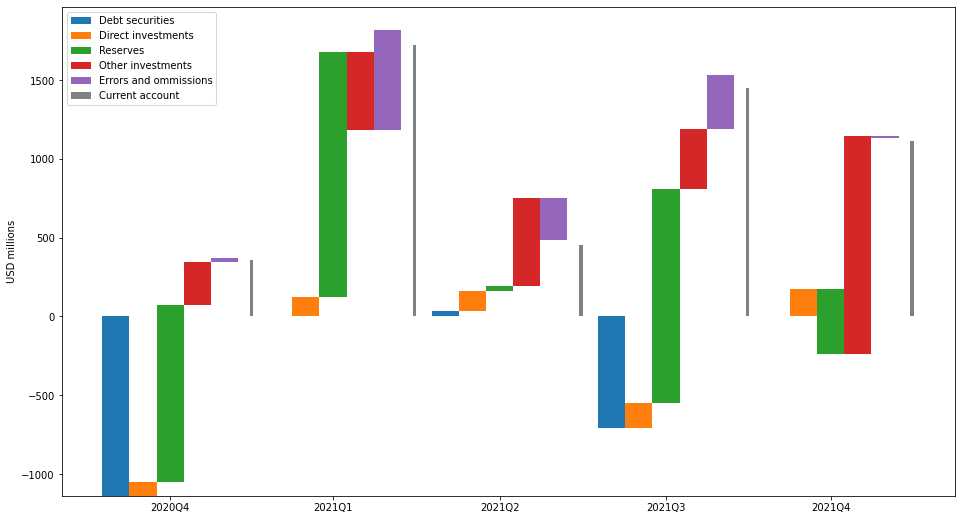

In [57]:
plt.bar(financial_account_last_year['date'],financial_account_last_year['Debtsecurities22'],width=15,label="Debt securities")
plt.bar(financial_account_last_year['date']+pd.DateOffset(15),financial_account_last_year['DirectInvestments1'],bottom=financial_account_last_year['Debtsecurities22'],width=15, label="Direct investments")
plt.bar(financial_account_last_year['date']+pd.DateOffset(30),financial_account_last_year['Reserveassets75'],bottom=financial_account_last_year['DirectInvestments1']+financial_account_last_year['Debtsecurities22'],width=15, label="Reserves")
plt.bar(financial_account_last_year['date']+pd.DateOffset(45),financial_account_last_year['Otherinvestment38'],bottom=financial_account_last_year['DirectInvestments1']+financial_account_last_year['Debtsecurities22']+financial_account_last_year['Reserveassets75'],width=15, label="Other investments")
plt.bar(financial_account_last_year['date']+pd.DateOffset(60),financial_account_last_year['ErrorsandOmmisions91'],bottom=financial_account_last_year['DirectInvestments1']+financial_account_last_year['Debtsecurities22']+financial_account_last_year['Reserveassets75']+financial_account_last_year['Otherinvestment38'],width=15, label="Errors and ommissions")
plt.bar(financial_account_last_year['date']+pd.DateOffset(75),financial_account_last_year['FinancialAccount0']+financial_account_last_year['ErrorsandOmmisions91'],width=2,label="Current account",color="gray")
plt.xticks(financial_account_last_year['date']+pd.DateOffset(30),qt)
plt.legend(loc='upper left')
plt.ylabel("USD millions")

#### Direct Investments

What are direct investments. blah blah...

Text(0, 0.5, 'USD millions')

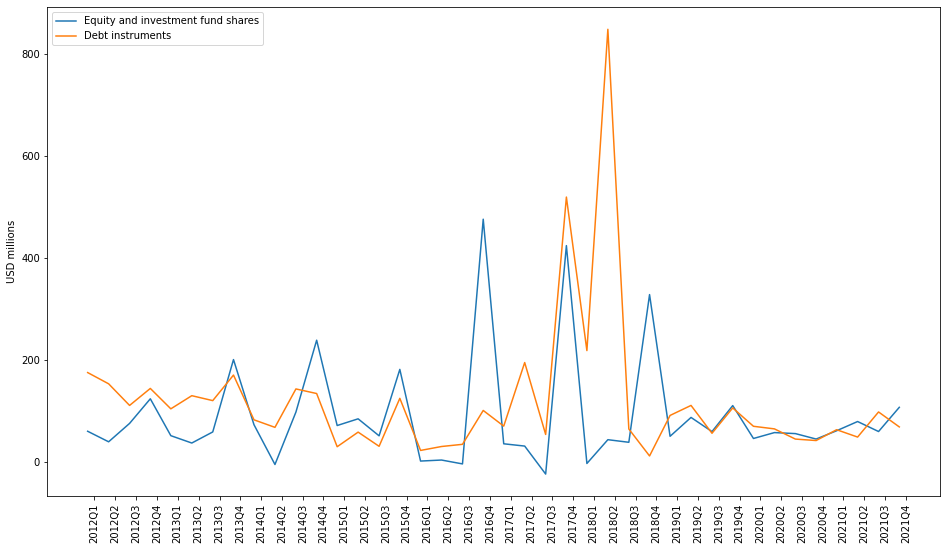

In [52]:
plt.plot(financial_account['date'],financial_account['Equityandinvestmentfundshares2'],label="Equity and investment fund shares")
plt.plot(financial_account['date'],financial_account['DebtInstruments11'],label="Debt instruments")
plt.xticks(financial_account['date']+pd.DateOffset(30),pd.PeriodIndex(financial_account['date'],freq='Q'),rotation=90)
plt.legend(loc='upper left')
plt.ylabel("USD millions")

#### Portfolio Investments

What are portfolio investments. blah blah...

Text(0, 0.5, 'USD millions')

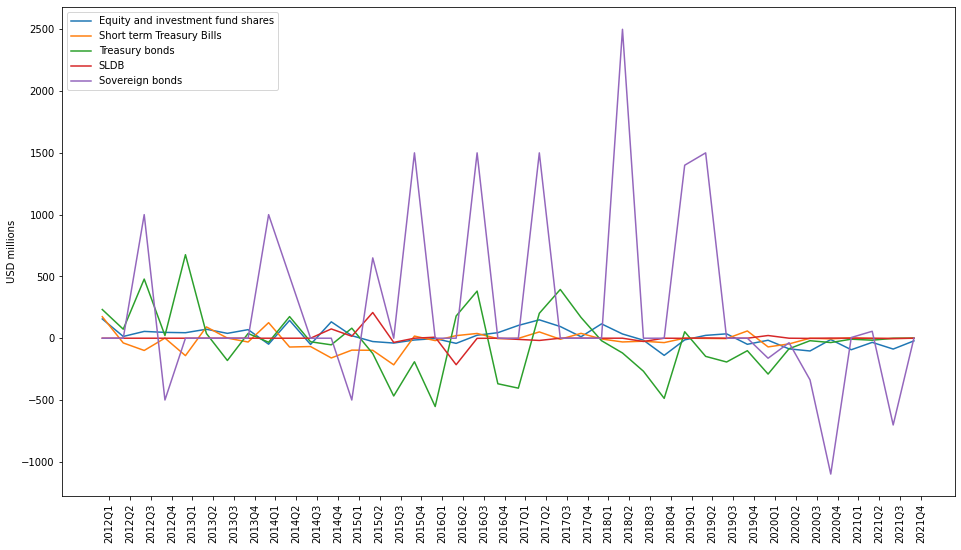

In [59]:
plt.plot(financial_account['date'],financial_account['Equityandinvestmentfundshares20'],label="Equity and investment fund shares")
plt.plot(financial_account['date'],financial_account['Shortterm(TreasuryBills)28'],label="Short term Treasury Bills")
plt.plot(financial_account['date'],financial_account['TreasuryBonds30'],label="Treasury bonds")
plt.plot(financial_account['date'],financial_account['SLDBs31'],label="SLDB")
plt.plot(financial_account['date'],financial_account['SovereignBonds32'],label="Sovereign bonds")
plt.xticks(financial_account['date']+pd.DateOffset(30),pd.PeriodIndex(financial_account['date'],freq='Q'),rotation=90)
plt.legend(loc='upper left')
plt.ylabel("USD millions")

#### Other Investments: Currency and Deposits

What are other investments. blah blah...


Text(0, 0.5, 'USD millions')

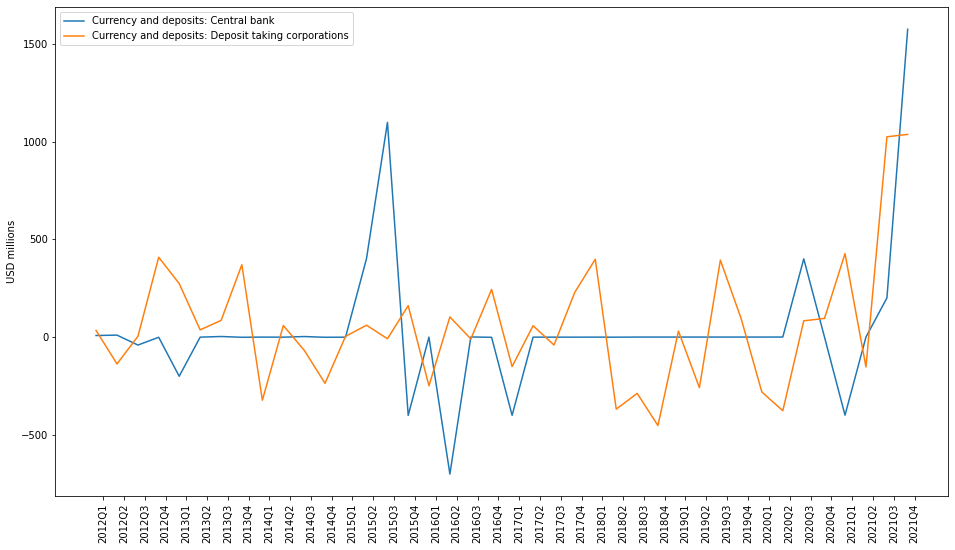

In [63]:
plt.plot(financial_account['date'],financial_account['CentralBank41'],label="Currency and deposits: Central bank")
plt.plot(financial_account['date'],financial_account['Deposittakingcorporations,otherthanthecentralbank44'],label="Currency and deposits: Deposit taking corporations")
plt.xticks(financial_account['date']+pd.DateOffset(30),pd.PeriodIndex(financial_account['date'],freq='Q'),rotation=90)
plt.legend(loc='upper left')
plt.ylabel("USD millions")

#### Other Investments: Loans

What are other investments. blah blah...


Text(0, 0.5, 'USD millions')

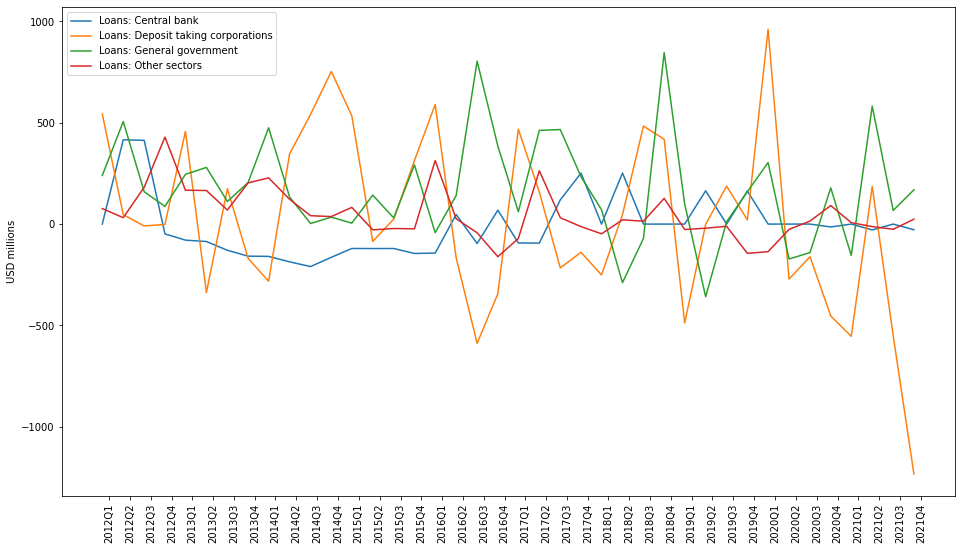

In [62]:
plt.plot(financial_account['date'],financial_account['Centralbank50'],label="Loans: Central bank")
plt.plot(financial_account['date'],financial_account['Deposittakingcorporations,expecttheCentralBank54'],label="Loans: Deposit taking corporations")
plt.plot(financial_account['date'],financial_account['GeneralGovernment57'],label="Loans: General government")
plt.plot(financial_account['date'],financial_account['Othersectors60'],label="Loans: Other sectors")
plt.xticks(financial_account['date']+pd.DateOffset(30),pd.PeriodIndex(financial_account['date'],freq='Q'),rotation=90)
plt.legend(loc='upper left')
plt.ylabel("USD millions")

#### Other Investments: Other

What are other investments. blah blah...


Text(0, 0.5, 'USD millions')

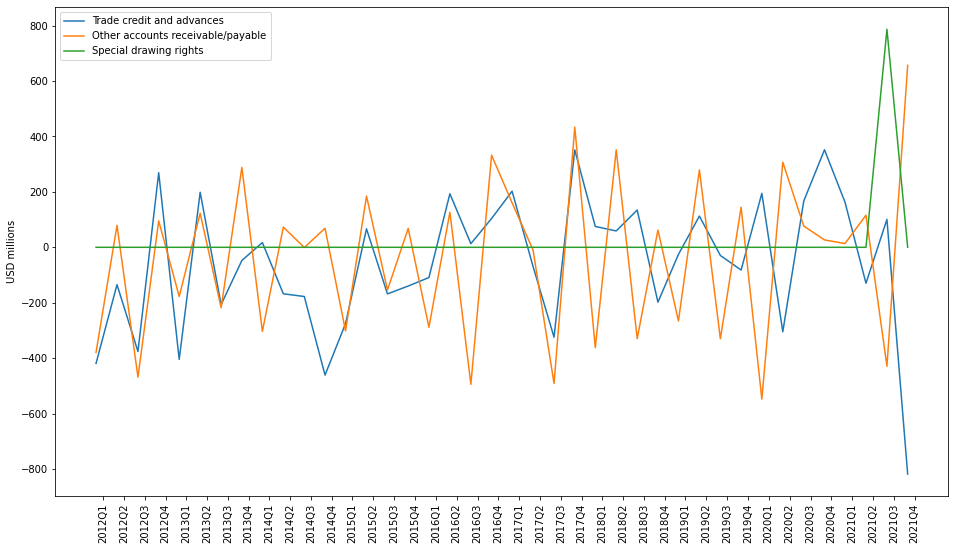

In [67]:
plt.plot(financial_account['date'],financial_account['Tradecreditsandadvances64'],label="Trade credit and advances")
plt.plot(financial_account['date'],financial_account['Otheraccountsreceivable/payable69'],label="Other accounts receivable/payable")
plt.plot(financial_account['date'],financial_account['SpecialDrawingrights74'],label="Special drawing rights")
plt.xticks(financial_account['date']+pd.DateOffset(30),pd.PeriodIndex(financial_account['date'],freq='Q'),rotation=90)
plt.legend(loc='upper left')
plt.ylabel("USD millions")

#### Reserve Assets

What are reserve assets. blah blah...


Text(0, 0.5, 'USD millions')

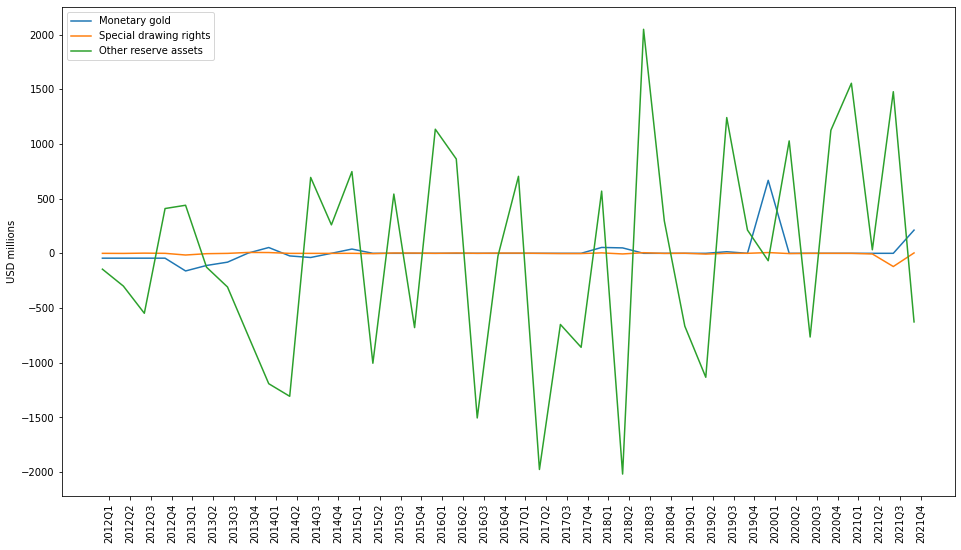

In [69]:
plt.plot(financial_account['date'],financial_account['Monetarygold76'],label="Monetary gold")
plt.plot(financial_account['date'],financial_account['Specialdrawingrights77'],label="Special drawing rights")
plt.plot(financial_account['date'],financial_account['Otherreserveassets79'],label="Other reserve assets")
plt.xticks(financial_account['date']+pd.DateOffset(30),pd.PeriodIndex(financial_account['date'],freq='Q'),rotation=90)
plt.legend(loc='upper left')
plt.ylabel("USD millions")